### 신입교육세션 회귀분석 실습과 과제
1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!

In [48]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install --upgrade numpy

                                              0.0/15.0 MB ? eta -:--:--
                                              0.3/15.0 MB 9.2 MB/s eta 0:00:02
                                              0.3/15.0 MB 9.2 MB/s eta 0:00:02
     -                                        0.7/15.0 MB 4.6 MB/s eta 0:00:04
     --                                       1.1/15.0 MB 5.9 MB/s eta 0:00:03
     ----                                     1.9/15.0 MB 7.8 MB/s eta 0:00:02
     ------                                   2.5/15.0 MB 8.7 MB/s eta 0:00:02
     ------                                   2.5/15.0 MB 8.8 MB/s eta 0:00:02
     --------                                 3.1/15.0 MB 8.7 MB/s eta 0:00:02
     ---------                                3.6/15.0 MB 8.7 MB/s eta 0:00:02
     ----------                               4.1/15.0 MB 9.0 MB/s eta 0:00:02
     ------------                             4.6/15.0 MB 9.2 MB/s eta 0:00:02
     -------------                            5.2/15.0 MB 9

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\김현호\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [50]:
file_path = r'"C:\Users\김현호\Desktop\ybigta2023-1 assignments_hhk\ybigta_assignments_hhk\8.통계기초,회귀분석\diabetes_XY.csv"'

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "__init__.pxd", line 942, in numpy.import_array
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\김현호\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\김현호\AppData\Local\Temp\ipykernel_10520\4119560631.py", line 1, in <module>
    import statsmodels.api as sm
  File "c:\Users\김현호\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\api.py", line 125, in <module>
    from .graphics import api as graphics
  File "c:\Users\김현호\AppDat

In [54]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

res2.summary()

NameError: name 'ols' is not defined

In [38]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

NameError: name 'X' is not defined

In [39]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

NameError: name 'X_' is not defined

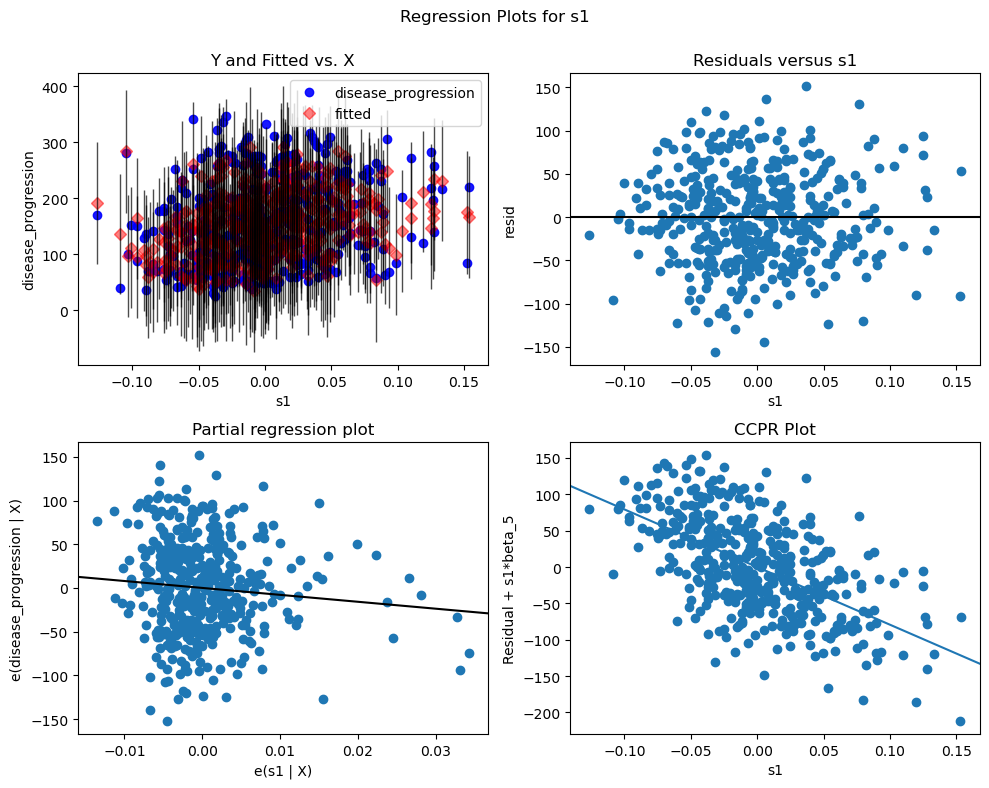

In [ ]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

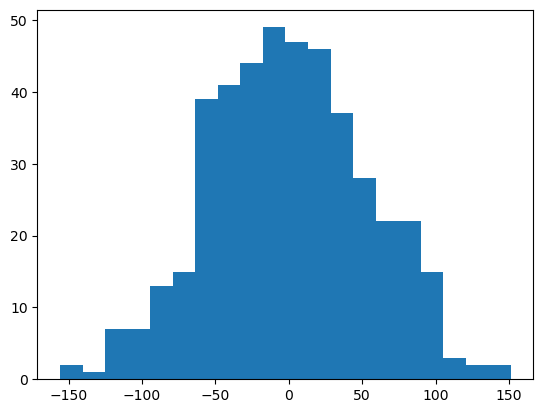

In [ ]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [ ]:
# 데이터 불러오기
data = pd.read_csv('Student_Performance.csv', index_col = 0)
data.head()

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [ ]:
##여기를 수정하세요##


2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [ ]:
##여기를 수정하세요##

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

설명: ##여기를 수정하세요##

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

In [ ]:
##여기를 수정하세요##

설명: ##여기를 수정하세요##